In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import randint, norm
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# basic Regressor

In [3]:
from sklearn.preprocessing import MinMaxScaler

spotify = pd.read_csv('./assets/spotify_songs.csv')

spotify = spotify.drop(columns=["track_id", "track_name", "track_artist", "track_album_id", "track_album_name", "playlist_name", "playlist_id"])

spotify = pd.get_dummies(data=spotify, columns=["playlist_genre", "playlist_subgenre"])

spotify["track_album_release_date"] = spotify["track_album_release_date"].str.split("-").str[0]

spotify["track_album_release_date"] = spotify["track_album_release_date"].astype(float)

scaler = MinMaxScaler()
spotify = pd.DataFrame(scaler.fit_transform(spotify), columns=spotify.columns)

spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   track_popularity                             32821 non-null  float64
 1   track_album_release_date                     32821 non-null  float64
 2   danceability                                 32821 non-null  float64
 3   energy                                       32821 non-null  float64
 4   key                                          32821 non-null  float64
 5   loudness                                     32821 non-null  float64
 6   mode                                         32821 non-null  float64
 7   speechiness                                  32821 non-null  float64
 8   acousticness                                 32821 non-null  float64
 9   instrumentalness                             32821 non-null  float64
 10

In [4]:
X = spotify.drop(columns='track_popularity')
y = spotify.track_popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [4]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

forest_cv = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions= {'n_estimators': n_estimators,
                 'max_features': max_features,
                 'max_depth': max_depth},
    n_jobs=-1,
    cv=5,
    verbose=999,
    scoring='neg_mean_squared_error',
)

forest_cv.fit(X_train, y_train)
forest_cv.score(X_test, y_test)

predictions = forest_cv.predict(X_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
np.sqrt(error)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File 

20.709701792667214

In [5]:
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

predictions = forest.predict(X_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
np.sqrt(error)

20.54865022374271

In [5]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

predictions = svr.predict(X_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
np.sqrt(error)

0.22399779060558214

In [7]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

predictions = gbr.predict(X_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
np.sqrt(error)

21.926004772104534

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='track_popularity', ylabel='Count'>

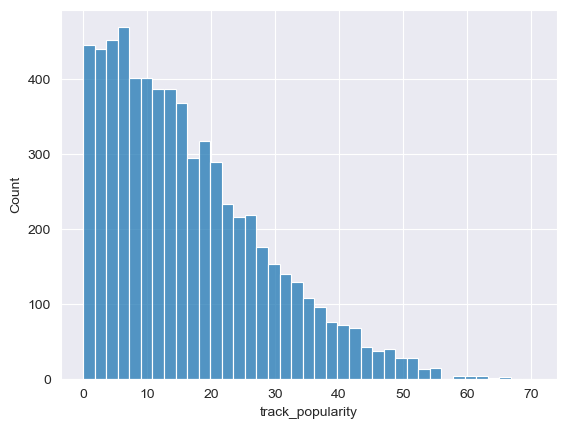

In [8]:
y_pred = forest.predict(X_test)

error = np.abs(y_test - y_pred)

sns.histplot(error)

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='track_popularity', ylabel='Count'>

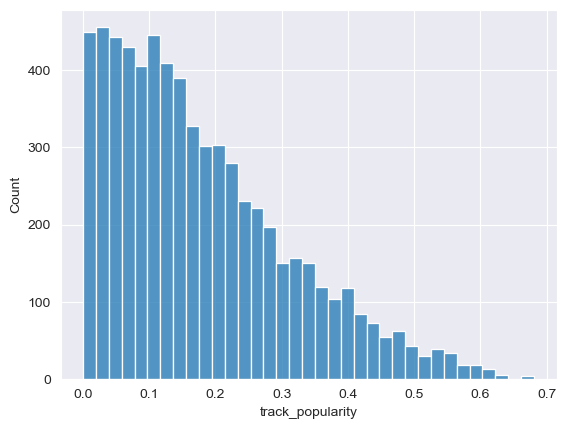

In [6]:
y_pred = svr.predict(X_test)

error = np.abs(y_test - y_pred)

sns.histplot(error)

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='track_popularity', ylabel='Count'>

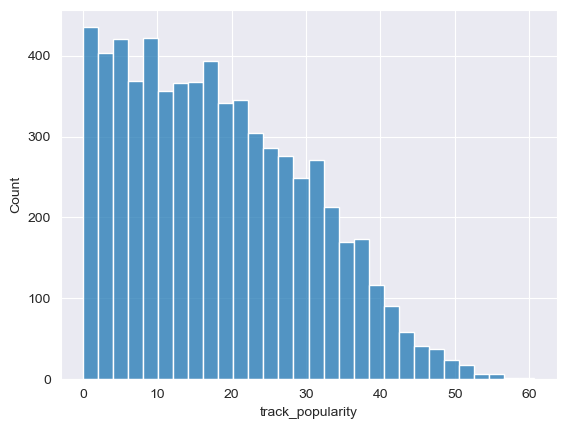

In [10]:
y_pred = gbr.predict(X_test)

error = np.abs(y_test - y_pred)

sns.histplot(error)

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='track_popularity', ylabel='Count'>

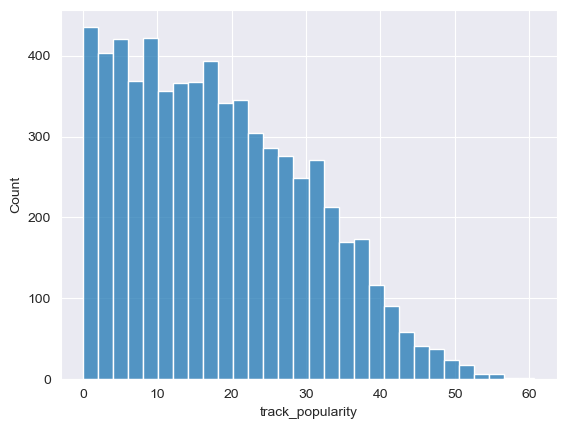

In [15]:
y_pred = gbr.predict(X_test)

error = np.abs(y_test - y_pred)

sns.histplot(error)